In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the dataset
dataset_path = "C:/Users/Lenovo/Downloads/archive"  # Replace with the path to your downloaded folder

# Initialize lists to store image data and corresponding labels
data = []
labels = []

# Define the number of samples to use
num_samples = 1000  # Adjust this number to define the size of the subset

# Iterate through each subfolder in the train folder
train_folder_path = os.path.join(dataset_path, "train")
for subfolder in os.listdir(train_folder_path):
    subfolder_path = os.path.join(train_folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Read images and convert them to grayscale
    for i, filename in enumerate(os.listdir(subfolder_path)):
        if i >= num_samples:
            break
        image_path = os.path.join(subfolder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            # Resize the image to a fixed size (e.g., 100x100)
            image = cv2.resize(image, (100, 100))
            data.append(image)
            labels.append(subfolder)

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Step 3: Extract features from the images
# Flatten the 2D images to 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Step 4: Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Step 5: Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Predict mood and suggest songs
image_path = "C:/Users/Lenovo/Downloads/julien-l-sLrw_Cx6u_I-unsplash.jpg"  # Replace with the path to your test image
test_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if test_image is not None:
    # Resize the test image to the same size as the training images
    test_image = cv2.resize(test_image, (100, 100))
    test_image = test_image.reshape(1, -1)

    # Predict the mood of the test image
    predicted_label = label_encoder.inverse_transform(svm.predict(test_image))[0]
    print("Predicted Mood:", predicted_label)


Accuracy: 0.32919254658385094
Predicted Mood: sad


Accuracy: 0.32919254658385094


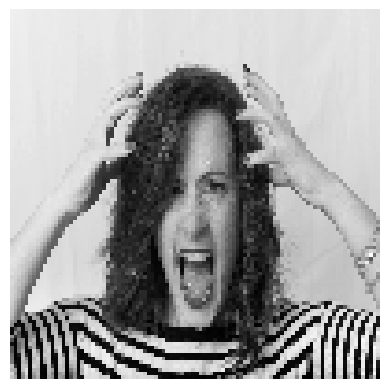

Predicted Mood: sad


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
dataset_path = "C:/Users/Lenovo/Downloads/archive" # Replace with the path to your downloaded folder

# Initialize lists to store image data and corresponding labels
data = []
labels = []

# Define the number of samples to use
num_samples = 1000  # Adjust this number to define the size of the subset

# Iterate through each subfolder in the train folder
train_folder_path = os.path.join(dataset_path, "train")
for subfolder in os.listdir(train_folder_path):
    subfolder_path = os.path.join(train_folder_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    # Read images and convert them to grayscale
    for i, filename in enumerate(os.listdir(subfolder_path)):
        if i >= num_samples:
            break
        image_path = os.path.join(subfolder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            # Resize the image to a fixed size (e.g., 100x100)
            image = cv2.resize(image, (100, 100))
            data.append(image)
            labels.append(subfolder)

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Step 3: Extract features from the images
# Flatten the 2D images to 1D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Step 4: Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Step 5: Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Predict mood and suggest songs
image_path = "C:/Users/Lenovo/Downloads/julien-l-sLrw_Cx6u_I-unsplash.jpg"  # Replace with the path to your test image
test_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if test_image is not None:
    # Resize the test image to the same size as the training images
    test_image = cv2.resize(test_image, (100, 100))
    test_image = test_image.reshape(1, -1)

    # Display the test image
    plt.imshow(test_image.reshape(100, 100), cmap='gray')
    plt.axis('off')
    plt.show()

    # Predict the mood of the test image
    predicted_label = label_encoder.inverse_transform(svm.predict(test_image))[0]
    print("Predicted Mood:", predicted_label)
